In [4]:
!pip install TextBlob
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

     -------------------------------------- 626.3/626.3 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [5]:
data = pd.read_csv('twitter_training.csv')

In [6]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [8]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
df.shape

(74682, 4)

In [10]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [11]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [12]:
df.dropna(axis=0 , inplace=True)

In [13]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [14]:
df.duplicated().sum()

2340

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
df.shape

(71656, 4)

In [17]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64

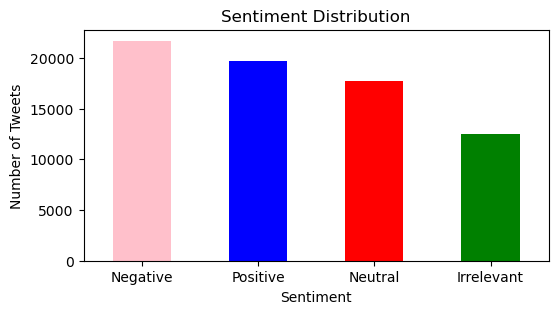

In [22]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['pink', 'blue', 'red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()
     

In [19]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: Sentiment, dtype: int64

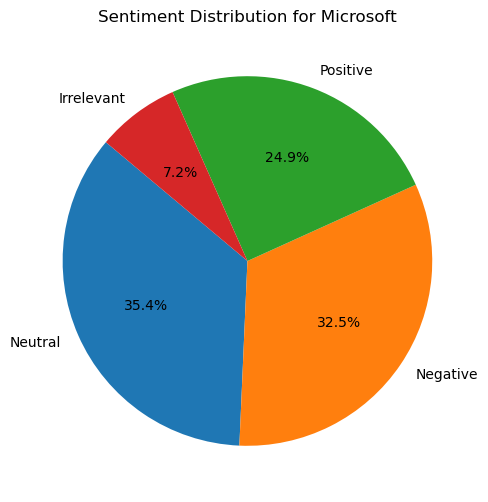

In [23]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()